In [74]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import ydata_profiling
from quickda.clean_data import *

In [75]:
# Leer archivo csv
df = pd.read_csv('./Datasets/CompleteDataset.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [76]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


En esta ocasión, y debido a la gran cantidad de columnas, se decidió no utilizar el profiler de pandas. Pero, se revisó en la página de dónde se obtuvieron los datos las gráficas sobre cada columna que este brindaba. De ella se pueden hacer las siguientes observaciones: 
- En las últimas columnas, el 10% de los datos son nulos. 
- Existen muchos datos atípicos
- No se pueden observar muy bien, pero las gráficas de GK son especiales, probablemente porque la mayoría de ellas aplican solo a los porteros. 


## Limpieza de datos

In [77]:
df['Curve'][412] # Se puede observar que los números no son todos numéricos

'60+7'

In [78]:
# Convertir las columnas no númericas a numéricas

In [79]:
df['Value'][0]

'€95.5M'

In [80]:
# Columna value de dinero a valor

for x in range(len(df['Value'])):
    og = df['Value'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Value'] = temp

df = df.astype({'Value':'int'})
df['Value']

0         95500000
1        105000000
2        123000000
3         97000000
4         61000000
           ...    
17976        50000
17977            0
17978        60000
17979        60000
17980        50000
Name: Value, Length: 17981, dtype: int32

In [81]:
# Columna Wage de dinero a valor

for x in range(len(df['Wage'])):
    og = df['Wage'][x]
    temp = og.removeprefix('€')
    temp = temp.removesuffix('M')
    temp = temp.removesuffix('K')
    temp = float(temp)
    # convertir los números que eran
    if (og[len(og) - 1] == 'M'):
        temp = temp * 1000000
    if (og[len(og) - 1] == 'K'):
        temp = temp * 1000
    temp = int(temp)
    df.loc[x, 'Wage'] = temp

df = df.astype({'Wage':'int'})
df['Wage']

0        565000
1        565000
2        280000
3        510000
4        230000
          ...  
17976      1000
17977      1000
17978      1000
17979      1000
17980      1000
Name: Wage, Length: 17981, dtype: int32

In [82]:
# De num + num a total
masCols = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing',
           'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK positioning', 
           'GK kicking', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots',
           'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle',
           'Sprint speed', 'Stamina', 'Standing tackle', 'Sprint speed', 'Stamina', 'Strength', 'Vision',
           'Volleys'
          ] # Columnas que sufren de este formato

for col in masCols:
    for x in range(len(df[col])):
        temp = df[col][x]
        if (type(temp) != int and type(temp) != np.int32): 
            if temp.__contains__('+'):
                temp2 = temp.split('+')
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a + b
            elif temp.__contains__('-'):
                a = int(temp2[0])
                b = int(temp2[1])
                temp = a - b
            temp = int(temp)
        df.loc[x, col] = temp
        
    # cambiar el tipo de dato 
    df = df.astype({col: 'int'})

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  int32  
 11  Wage                 17981 non-null  int32  
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  int32  
 14  Aggression           17981 non-null  int32  
 15  Agility              17981 non-null 

<AxesSubplot:>

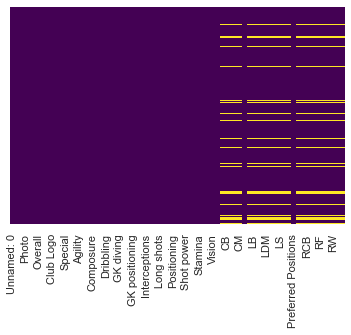

In [84]:
# Revisar datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [85]:
# Botar las vacías en club
df.dropna(subset = ['Club'], inplace = True)

Según los las tablas que muestra donde se consiguieron los datos, para las columnas que se encuentran al final el 11% de los datos falta. Investigando sobre la data y sobre los jugadores, se pudo notar que Todos estos datos faltantes son de jugadores que juegan la posición
de portero, por lo que muchos de los atributos no cuentan para ellos. 

Por esa misma razón se decidión eliminar las columnas con datos faltantes en vez de elimninar a los jugadores para que de esa manera no se tomaran en cuenta todos los jugadores menos porteros. 

In [86]:
df.dropna(how='any', axis=1, inplace = True)

<AxesSubplot:>

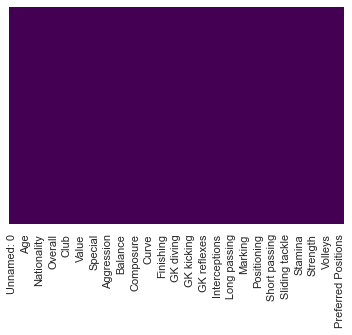

In [87]:
# Revisar si quedaron datos nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [88]:
# botamos otra columnas como el nombre, foto y bandera que no ayudan en el modelo
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Photo', axis = 1)
df = df.drop('Flag', axis = 1)
df = df.drop('Club Logo', axis = 1)
df = df.drop('ID', axis = 1)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  17733 non-null  int64 
 1   Nationality          17733 non-null  object
 2   Overall              17733 non-null  int64 
 3   Potential            17733 non-null  int64 
 4   Club                 17733 non-null  object
 5   Value                17733 non-null  int32 
 6   Wage                 17733 non-null  int32 
 7   Special              17733 non-null  int64 
 8   Acceleration         17733 non-null  int32 
 9   Aggression           17733 non-null  int32 
 10  Agility              17733 non-null  int32 
 11  Balance              17733 non-null  int32 
 12  Ball control         17733 non-null  int32 
 13  Composure            17733 non-null  int32 
 14  Crossing             17733 non-null  int32 
 15  Curve                17733 non-null  int32 
 16  Drib

### Normalización

In [90]:
dummies_n = pd.get_dummies(df['Nationality'])
dummies_c = pd.get_dummies(df['Club'])
dummies_pp = pd.get_dummies(df['Preferred Positions'])

In [91]:
df = pd.concat([df, dummies_n, dummies_c, dummies_pp], axis = 1)

In [92]:
df = df.drop(['Nationality', 'Club', 'Preferred Positions'], axis = 1)

In [93]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,ST RM CF,ST RM LM,ST RM LM CAM,ST RM LW,ST RM RB,ST RM RW,ST RW,ST RW CAM,ST RW LW,ST RW RM
0,32,94,94,95500000,565000,2228,89,63,89,63,...,0,0,0,0,0,0,0,0,0,0
1,30,93,93,105000000,565000,2154,92,48,90,95,...,0,0,0,0,0,0,0,0,0,0
2,25,92,94,123000000,280000,2100,94,56,96,82,...,0,0,0,0,0,0,0,0,0,0
3,30,92,92,97000000,510000,2291,88,78,86,60,...,0,0,0,0,0,0,0,0,0,0
4,31,92,92,61000000,230000,1493,58,29,52,35,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17733 entries, 0 to 17980
Columns: 1644 entries, Age to ST RW RM 
dtypes: int32(36), int64(4), uint8(1604)
memory usage: 30.2 MB


## Modelo

Basado en: https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/

### Generación de dataframe con valores

In [95]:
df_X = df.drop(['Potential'], axis = 1) # Potential es nuestro y
X = df_X.iloc[:, :].values
X

array([[       32,        94,  95500000, ...,         0,         0,
                0],
       [       30,        93, 105000000, ...,         0,         0,
                0],
       [       25,        92, 123000000, ...,         0,         0,
                0],
       ...,
       [       17,        46,     60000, ...,         0,         0,
                0],
       [       18,        46,     60000, ...,         0,         0,
                0],
       [       18,        46,     50000, ...,         0,         0,
                0]], dtype=int64)

In [96]:
# y = df.iloc[:, 7].values
y = df.iloc[:, 7].values
y

array([63, 48, 56, ..., 26, 46, 52])

### Separación del modelo

In [97]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [98]:
X_entreno 

array([[     19,      55,  160000, ...,       0,       0,       0],
       [     25,      68, 1200000, ...,       0,       0,       0],
       [     23,      60,  230000, ...,       0,       0,       0],
       ...,
       [     25,      63,  400000, ...,       0,       0,       0],
       [     24,      60,  280000, ...,       0,       0,       0],
       [     28,      70, 1800000, ...,       0,       0,       0]],
      dtype=int64)

In [99]:
y_entreno

array([26, 31, 20, ..., 22, 41, 53])

## Implementación sin librerías

In [100]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance',
       ...
       'ST RM CF ', 'ST RM LM ', 'ST RM LM CAM ', 'ST RM LW ', 'ST RM RB ',
       'ST RM RW ', 'ST RW ', 'ST RW CAM ', 'ST RW LW ', 'ST RW RM '],
      dtype='object', length=1644)

In [101]:
import pandas as pd
import numpy as np

def gini_impurity(y):
    '''
    Given a Pandas Series, it calculates the Gini Impurity. 
    y: variable with which calculate Gini Impurity.
    '''
    if isinstance(y, pd.Series):
        p = y.value_counts()/y.shape[0]
        gini = 1-np.sum(p**2)
        return(gini)

    else:
        raise('Object must be a Pandas Series.')

gini_impurity(df.Balance) 
# df.columns

0.9788785790964503

In [102]:
def entropy(y):
    '''
    Given a Pandas Series, it calculates the entropy. 
    y: variable with which calculate entropy.
    '''
    if isinstance(y, pd.Series):
        a = y.value_counts()/y.shape[0]
        entropy = np.sum(-a*np.log2(a+1e-9))
        return(entropy)

    else:
        raise('Object must be a Pandas Series.')

entropy(df.Balance)

5.797150609804382

In [103]:
def variance(y):
    '''
    Function to help calculate the variance avoiding nan.
    y: variable to calculate variance to. It should be a Pandas Series.
    '''
    if(len(y) == 1):
        return 0
    else:
        return y.var()

def information_gain(y, mask, func=entropy):
    '''
    It returns the Information Gain of a variable given a loss function.
    y: target variable.
    mask: split choice.
    func: function to be used to calculate Information Gain in case os classification.
    '''
    
    a = sum(mask)
    b = mask.shape[0] - a
    
    if(a == 0 or b ==0): 
        ig = 0
    
    else:
        if y.dtypes != 'O':
            ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
        else:
            ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
    
    return ig

information_gain(df['Potential'], df['Overall'] >= 60)

5.112155109071296

In [104]:
import itertools

def categorical_options(a):
    '''
    Creates all possible combinations from a Pandas Series.
    a: Pandas Series from where to get all possible combinations. 
    '''
    a = a.unique()

    opciones = []
    for L in range(0, len(a)+1):
        for subset in itertools.combinations(a, L):
            subset = list(subset)
            opciones.append(subset)

    return opciones[1:-1]

def max_information_gain_split(x, y, func=entropy):
    '''
    Given a predictor & target variable, returns the best split, the error and the type of variable based on a selected cost function.
    x: predictor variable as Pandas Series.
    y: target variable as Pandas Series.
    func: function to be used to calculate the best split.
    '''

    split_value = []
    ig = [] 

    numeric_variable = True if x.dtypes != 'O' else False

    # Create options according to variable type
    if numeric_variable:
        options = x.sort_values().unique()[1:]
    else: 
        options = categorical_options(x)

    # Calculate ig for all values
    for val in options:
        mask =   x < val if numeric_variable else x.isin(val)
        val_ig = information_gain(y, mask, func)
        # Append results
        ig.append(val_ig)
        split_value.append(val)

    # Check if there are more than 1 results if not, return False
    if len(ig) == 0:
        return(None,None,None, False)

    else:
    # Get results with highest IG
        best_ig = max(ig)
        best_ig_index = ig.index(best_ig)
        best_split = split_value[best_ig_index]
        return(best_ig,best_split,numeric_variable, True)


weight_ig, weight_slpit, _, _ = max_information_gain_split(df['Balance'], df['Potential'],)  


print(
"El mejor split para Nationality es cuando la variable es inferior a ",
weight_slpit,"\nEl Information Gain para ese corte es:", weight_ig
)

El mejor split para Nationality es cuando la variable es inferior a  74 
El Information Gain para ese corte es: 0.6163617220036297


In [105]:
df.drop('Potential', axis= 1).apply(max_information_gain_split, y = df['Potential'])

,Age,Overall,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,...,ST RM CF,ST RM LM,ST RM LM CAM,ST RM LW,ST RM RB,ST RM RW,ST RW,ST RW CAM,ST RW LW,ST RW RM
0,1.821318,12.258315,15.769018,10.850447,5.606915,1.725097,1.307642,1.806885,0.616362,7.892556,...,0.009223,0.000943,-0.000446,0.000035,0.000002,-0.003035,-0.000724,-0.001325,0.002943,0.000125
1,25,70,925000,10000,1835,75,67,74,74,71,...,1,1,1,1,1,1,1,1,1,1
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [106]:
def get_best_split(y, data):
    '''
    Given a data, select the best split and return the variable, the value, the variable type and the information gain.
    y: name of the target variable
    data: dataframe where to find the best split.
    '''
    masks = data.drop(y, axis= 1).apply(max_information_gain_split, y = data[y])
    if sum(masks.loc[3,:]) == 0:
        return(None, None, None, None)

    else:
    # Get only masks that can be splitted
        masks = masks.loc[:,masks.loc[3,:]]

        # Get the results for split with highest IG
        split_variable = masks.iloc[0].astype(np.float32).idxmax()
        #split_valid = masks[split_variable][]
        split_value = masks[split_variable][1] 
        split_ig = masks[split_variable][0]
        split_numeric = masks[split_variable][2]

        return(split_variable, split_value, split_ig, split_numeric)


def make_split(variable, value, data, is_numeric):
    '''
    Given a data and a split conditions, do the split.
    variable: variable with which make the split.
    value: value of the variable to make the split.
    data: data to be splitted.
    is_numeric: boolean considering if the variable to be splitted is numeric or not.
    '''
    if is_numeric:
        data_1 = data[data[variable] < value]
        data_2 = data[(data[variable] < value) == False]

    else:
        data_1 = data[data[variable].isin(value)]
        data_2 = data[(data[variable].isin(value)) == False]

    return(data_1,data_2)

def make_prediction(data, target_factor):
    '''
    Given the target variable, make a prediction.
    data: pandas series for target variable
    target_factor: boolean considering if the variable is a factor or not
    '''

    # Make predictions
    if target_factor:
        pred = data.value_counts().idxmax()
    else:
        pred = data.mean()

    return pred

In [107]:
def train_tree(data,y, target_factor, max_depth = None,min_samples_split = None, min_information_gain = 1e-20, counter=0, max_categories = 20):
    '''
    Trains a Decission Tree
    data: Data to be used to train the Decission Tree
    y: target variable column name
    target_factor: boolean to consider if target variable is factor or numeric.
    max_depth: maximum depth to stop splitting.
    min_samples_split: minimum number of observations to make a split.
    min_information_gain: minimum ig gain to consider a split to be valid.
    max_categories: maximum number of different values accepted for categorical values. High number of values will slow down learning process. R
    '''

    # Check that max_categories is fulfilled
    if counter==0:
        types = data.dtypes
        check_columns = types[types == "object"].index
        for column in check_columns:
            var_length = len(data[column].value_counts()) 
            if var_length > max_categories:
                raise ValueError('The variable ' + column + ' has '+ str(var_length) + ' unique values, which is more than the accepted ones: ' +  str(max_categories))

    # Check for depth conditions
    if max_depth == None:
        depth_cond = True

    else:
        if counter < max_depth:
            depth_cond = True

        else:
            depth_cond = False

    # Check for sample conditions
    if min_samples_split == None:
        sample_cond = True

    else:
        if data.shape[0] > min_samples_split:
            sample_cond = True

        else:
            sample_cond = False

    # Check for ig condition
    if depth_cond & sample_cond:

        var,val,ig,var_type = get_best_split(y, data)

        # If ig condition is fulfilled, make split 
        if ig is not None and ig >= min_information_gain:

            counter += 1

            left,right = make_split(var, val, data,var_type)

            # Instantiate sub-tree
            split_type = "<=" if var_type else "in"
            question =   "{} {}  {}".format(var,split_type,val)
            # question = "\n" + counter*" " + "|->" + var + " " + split_type + " " + str(val) 
            subtree = {question: []}


            # Find answers (recursion)
            yes_answer = train_tree(left,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

            no_answer = train_tree(right,y, target_factor, max_depth,min_samples_split,min_information_gain, counter)

            if yes_answer == no_answer:
                subtree = yes_answer

            else:
                subtree[question].append(yes_answer)
                subtree[question].append(no_answer)

        # If it doesn't match IG condition, make prediction
        else:
            pred = make_prediction(data[y],target_factor)
            return pred

    # Drop dataset if doesn't match depth or sample conditions
    else:
        pred = make_prediction(data[y],target_factor)
        return pred

    return subtree


max_depth = 5
min_samples_split = 20
min_information_gain  = 1e-5


decisiones = train_tree(df,'Potential',True, max_depth,min_samples_split,min_information_gain)


decisiones

{'Value <=  925000': [{'Age <=  24': [{'Value <=  180000': [{'Age <=  20': [{'Value <=  110000': [64,
          68]},
        {'Value <=  110000': [61, 67]}]},
      {'Age <=  20': [{'Value <=  500000': [72, 75]},
        {'Value <=  450000': [69, 72]}]}]},
    {'Overall <=  64': [{'Value <=  140000': [{'Overall <=  55': [54, 59]},
        {'Age <=  26': [65, 63]}]},
      {'Value <=  600000': [{'Overall <=  68': [65, 68]},
        {'Age <=  25': [70, 68]}]}]}]},
  {'Value <=  7000000': [{'Age <=  24': [{'Value <=  1600000': [{'Age <=  21': [78,
          75]},
        {'Age <=  21': [82, 79]}]},
      {'Value <=  2600000': [{'Age <=  25': [74, 71]},
        {'Value <=  4099999': [73, 74]}]}]},
    {'Value <=  11500000': [{'Age <=  24': [{'Age <=  22': [83, 82]},
        {'Value <=  8500000': [76, 78]}]},
      {'Value <=  28500000': [{'Age <=  24': [85, 82]},
        {'Value <=  51500000': [88, 90]}]}]}]}]}

In [108]:
def clasificar_datos(observacion, arbol):
    question = list(arbol.keys())[0] 


    if question.split()[1] == '<=':

        if observacion[question.split()[0]] <= float(question.split()[2]):
            answer = arbol[question][0]
        else:
            answer = arbol[question][1]

    else:

        if observacion[question.split()[0]] in (question.split()[2]):
            answer = arbol[question][0]
        else:
            answer = arbol[question][1]


    # Si la respuesta no es un diccionario
    if not isinstance(answer, dict):
        return answer
    else:
        residual_tree = answer
        return clasificar_datos(observacion, answer)
observacion = {'Value': 100000, 'Age': 22, 'Overall': 60}
print(clasificar_datos(observacion, decisiones))


61


## Comparación con sklearn

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
modeloR = DecisionTreeRegressor()

In [111]:
modeloR.fit(X_entreno, y_entreno)

DecisionTreeRegressor()

In [112]:
y_predicciones = modeloR.predict(X_prueba)

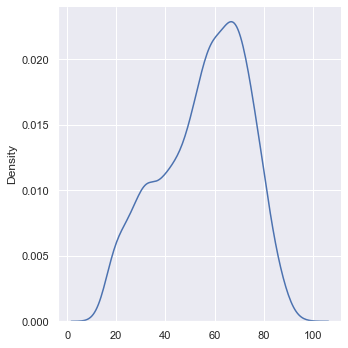

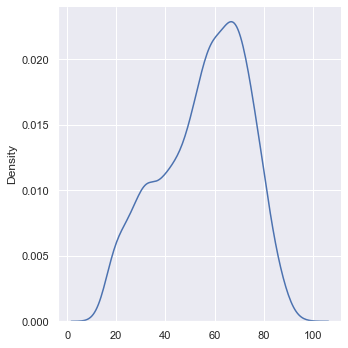

In [113]:
sns.displot(y_prueba, kind="kde")
sns.displot(y_predicciones, kind="kde")

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
confusion_matrix(y_prueba, y_predicciones)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 5, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_prueba, y_predicciones)

1.0